In [1]:
import pandas as pd

# 파생변수 이전 최종 데이터
beauty_data = pd.read_csv('final_beauty_dataset.csv')
# 데이터 통계치 요약
print(beauty_data.describe())

               post      follower       follow  open_account  \
count    940.000000  9.400000e+02   940.000000    940.000000   
mean    1678.821277  4.846747e+05  1060.675532      0.995745   
std     1929.336225  2.756739e+06  1759.847636      0.065129   
min        0.000000  3.119000e+03     0.000000      0.000000   
25%      434.000000  3.621625e+04   222.750000      1.000000   
50%     1058.000000  7.180900e+04   403.500000      1.000000   
75%     2179.750000  1.374570e+05   798.250000      1.000000   
max    17105.000000  4.390702e+07  7475.000000      1.000000   

       official_account    image_love  image_comment    video_love  \
count        940.000000  9.400000e+02     940.000000  9.400000e+02   
mean           0.140426  2.711334e+04     320.371277  3.736916e+04   
std            0.347613  2.421198e+05    3132.977893  2.639833e+05   
min            0.000000  0.000000e+00       0.000000  0.000000e+00   
25%            0.000000  4.200000e+02      10.000000  0.000000e+00   
50%

In [2]:
# outlier 부분 처리 - 수치가 0인 데이터 제외
for i in beauty_data.columns:
    print(i)
    print(beauty_data[i].count()-(beauty_data[i]==0).sum())

# follower 기준 최상위 influencer 제외 데이터프레임 - 실제로 사용하지 않음
sorted_df = beauty_data.sort_values(by=['follower'], axis=0, ascending=False)
sorted_df = sorted_df.iloc[100:]

account
940
post
939
follower
940
follow
926
open_account
936
official_account
132
image_love
925
image_comment
921
video_love
551
video_comment
534
igtv_love
85
igtv_comment
82


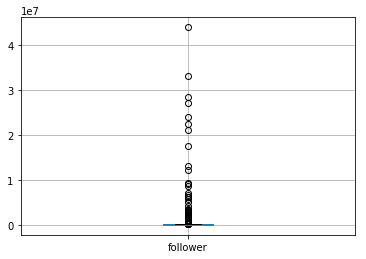

In [3]:
# 각 feature별 boxplot 확인
%matplotlib inline
import matplotlib.pyplot as plt

i_comment = pd.DataFrame(beauty_data['follower'])
mask = i_comment['follower'].isin([0])
i_comment = i_comment[~mask]

# preprocessing하지 않음 - low한 데이터 static 확인 목적 - 각 column 별 확인
i_comment.boxplot(column=['follower'])
plt.show()

In [4]:
# 상관관계 분석
import pandas as pd

corr=beauty_data.corr(method='pearson')
print(corr)

                      post  follower    follow  open_account  \
post              1.000000 -0.013286  0.078886     -0.045061   
follower         -0.013286  1.000000 -0.064218      0.009301   
follow            0.078886 -0.064218  1.000000      0.018971   
open_account     -0.045061  0.009301  0.018971      1.000000   
official_account  0.033335  0.350490 -0.155144     -0.020618   
image_love       -0.048098  0.756814 -0.057617      0.007324   
image_comment    -0.046541  0.706171 -0.048992      0.006688   
video_love       -0.025594  0.547028 -0.059601      0.009259   
video_comment    -0.027492  0.424768 -0.034690      0.005409   
igtv_love         0.023453  0.348935 -0.020859      0.005114   
igtv_comment      0.022440  0.404056 -0.019655      0.005983   

                  official_account  image_love  image_comment  video_love  \
post                      0.033335   -0.048098      -0.046541   -0.025594   
follower                  0.350490    0.756814       0.706171    0.547028   


       rate_image
count  925.000000
mean     0.031804
std      0.039255
min      0.000000
25%      0.010008
50%      0.020000
75%      0.038674
max      0.430868


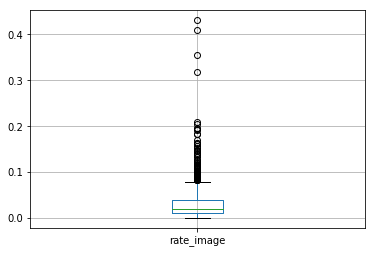

In [5]:
# ER 지수 좋아요/댓글 비율 확인 - 파생변수 도출을 위한 static 확인 
image_info = beauty_data[['image_love', 'image_comment']]
df_temp = pd.DataFrame(image_info['image_comment'] / image_info['image_love'])
df_temp.columns = ['rate_image']
print(df_temp.describe())
df_temp.boxplot(column=['rate_image'])
plt.show()

In [27]:
#파생변수 만들기 -> beauty_data_extend

# (1) ER 지수
# 1-1 좋아요, 댓글 비율 반영 x
ER_basic = pd.DataFrame((image_info['image_comment'] + image_info['image_love']) / beauty_data['follower'] * 100)
ER_basic.columns = ['ER']
# print(ER_basic.describe())
# ER_basic.boxplot(column=['ER'])
# plt.show()

# (2) 적극 참여 지수 - 댓글은 적극적인 반응이다 라는 전제 (위의 ER지수가 1:1비율이라 일단은 생성)
active_df = pd.DataFrame(image_info['image_comment'] / (image_info['image_love']+1) * 100)
active_df.columns = ['active_rate']
# print(active_df.describe())
# active_df.boxplot(column=['active_rate'])
# plt.show()

# ER, active_rate 반영 최종 데이터 셋 -> beauty_data_extend.csv
beauty_data_extend = pd.concat([beauty_data, ER_basic, active_df], axis=1)
beauty_data_extend.to_csv('beauty_data_extend.csv')